Visualization notebook where 2D parameter space slices can be viewed and qualitatively different initial conditions identified

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.axes as axes
import matplotlib.markers as mark
from CTRNNclass import *
from pyloricfitness import *

Note: I will want to first do a course search through wide section of slice, then finer data collection only around regions of interest. This is why resolution is modulatable.

In [2]:
par1 = 'theta1'
par2 = 'theta2'

par1_min = 2
par1_max = 3
par2_min = -6.5
par2_max = -5.5
par1_step = .01
par2_step = .01

par1_res = np.arange(par1_min,par1_max+.0001,par1_step)
par2_res = np.arange(par2_min,par2_max+.0001,par2_step)

Create a function which returns the parameter values put in for a point 

In [3]:
#Previous theta1 theta2 slice, not wide enough 
fitnessdata = np.loadtxt('slicetheta1theta2.dat')
print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater(fitnessdata, 0.15)
Z_Static = Z_Static.filled(0)
print(Z_Static)
Z_Disorder = np.ma.masked_less_equal(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
Z_Disorder = Z_Disorder.filled(0)
print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

(array([], dtype=int64), array([], dtype=int64))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


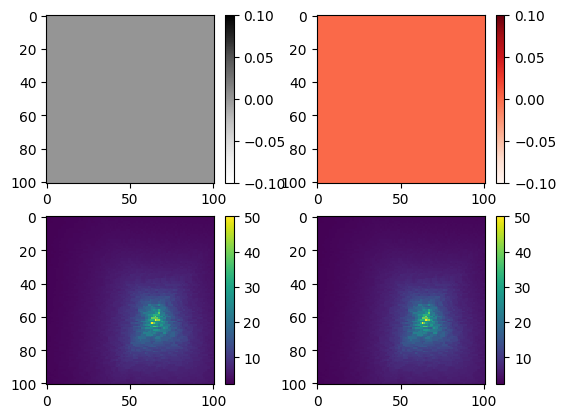

In [4]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
pos1 = ax1.imshow(Z_Static, cmap='Greys', interpolation='none')
fig.colorbar(pos1,ax=ax1)
pos2 = ax2.imshow(Z_Disorder, cmap='Reds', interpolation='none')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.imshow(Z_Pyloric, cmap='viridis', interpolation='none')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.imshow(fitnessdata, cmap='viridis', interpolation='none')
fig.colorbar(pos4,ax=ax4)

In [11]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 10
par2_min = -15
par2_max = 0
par1_step = .05
par2_step = .05

par1_res = np.arange(par1_min,par1_max,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max,par2_step)
print(len(par2_res))

200
300


In [8]:
#Theta1 Theta 3 slice with expanded area
# fitnessdata = np.loadtxt('slicetheta1theta3.dat').T
fitnessdata = np.loadtxt('slice.dat').T
print(len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

1301
(array([], dtype=int64), array([], dtype=int64))


In [98]:
par1_res[53]
par2_res[139]

-8.049999999999901

300 200


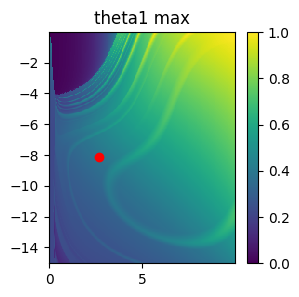

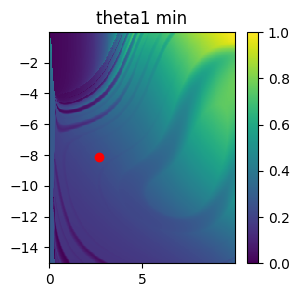

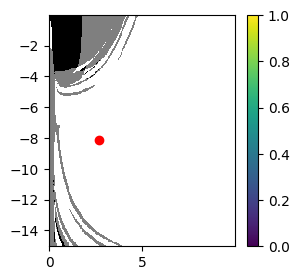

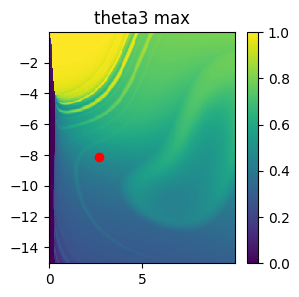

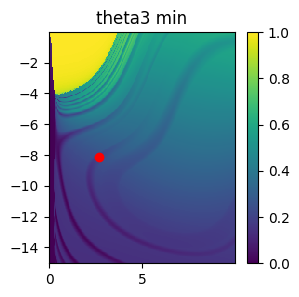

In [13]:
#Realm of Acceptability slice for 20 20,.05 .05 ,.95 .95,1000 1000
plt.rcParams["figure.figsize"]=(3,3)
accdata =np.loadtxt("realmacceptability.dat")
accdata = np.reshape(accdata,(len(par1_res),len(par2_res),2))
accdata = np.swapaxes(accdata,1,0)
maxmindata = np.loadtxt('maxmindetected.dat')
maxmindata = np.reshape(maxmindata,(len(par1_res),len(par2_res),2,3))
maxmindata = np.swapaxes(maxmindata,1,0)
print(len(accdata[:,:,0]),len(accdata[:,:,0][0]))
# plt.title(par1)
# plt.pcolormesh(par1_res,par2_res,accdata[:,:,0],cmap='binary')
# plt.colorbar()
# plt.show()
plt.title(par1 + " max")
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,0,0])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par1 + " min")
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,1,0])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
# plt.title(par2)
# plt.pcolormesh(par1_res,par2_res,accdata[:,:,1],cmap='binary')
# plt.colorbar()
# plt.show()
plt.pcolormesh(par1_res,par2_res,np.sum(accdata,axis=2),cmap='binary')
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par2 + " max")
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,0,2])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par2 + " min")
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,1,2])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()


It is possible to traverse the white regions because there is historesis (depends on where in state space you are when you enter that region of paramter space). It is analagous to the neuronal inertia in the object categorization agent. However, like in that case, we could do quasi-static approximation to find an approximate flow over this landscape.

How would we generate flows from this method to compare to the actual flows? At each step, you would have to run the circuit for a long time and see whivh direction HP wants to move in, and then do that and repeat.We could prove that quasistatic approximation is not that great for certain regions. 

In [99]:
#maxmin detected around the best pyloric solution peak
maxmindata[53,139]

array([[3.55230e-01, 9.99502e-01, 4.47151e-01],
       [1.78728e-01, 9.77109e-10, 1.99577e-01]])

So, design an HP mechanism with those ranges (for sliding windows of 1000 steps)

In [4]:
HPhanddesigned = np.array([200,1, 200,1,1,1, 1.78728e-01,0, 1.99577e-01,3.55230e-01,1, 4.47151e-01,1000,1, 1000])

In [3]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 13
par2_min = -20
par2_max = 0
par1_step = .01
par2_step = .01

par1_res = np.arange(par1_min,par1_max+.0001,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max,par2_step)
print(len(par2_res))

1301
2000


In [5]:
def plot_limitcycle(per, feats_7):
    time = np.arange(per)
    for i in range(len(feats_7)):
        plt.plot(time,feats_7[i])
    plt.plot(time,np.ones(len(time))*.5,color='r')
    plt.show()
    return

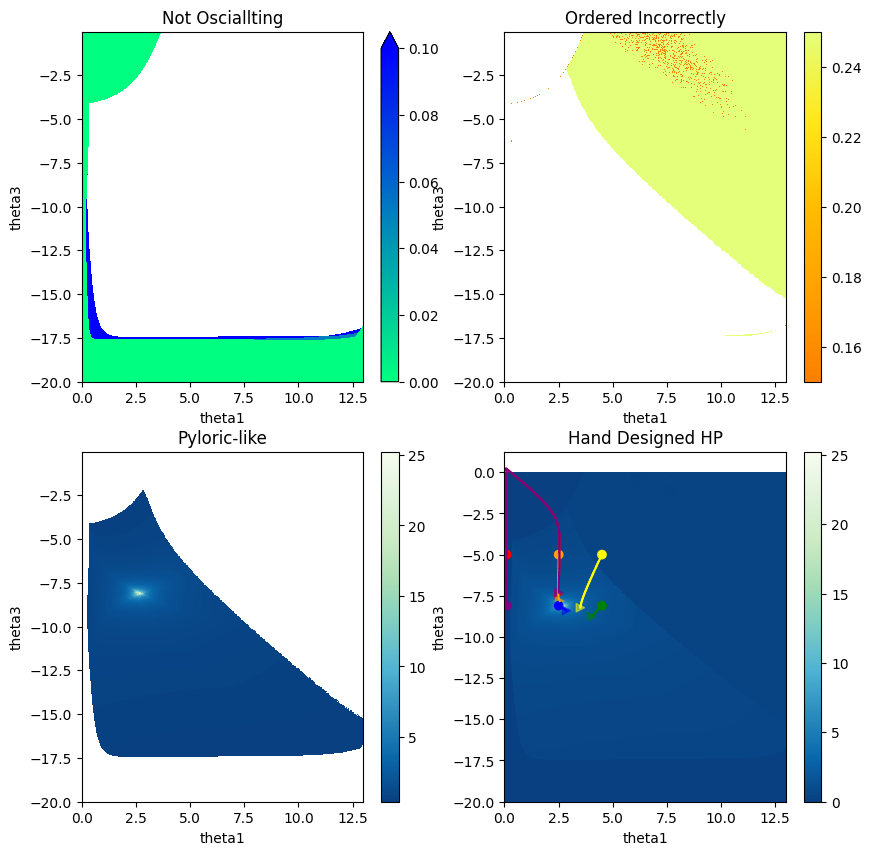

In [9]:
red = np.loadtxt('./HP_unevolved/redparamtrack_handdesign.dat')
orange = np.loadtxt('./HP_unevolved/orangeparamtrack_handdesign.dat')
yellow = np.loadtxt('./HP_unevolved/yellowparamtrack_handdesign.dat')
green = np.loadtxt('./HP_unevolved/greenparamtrack_handdesign.dat')
blue = np.loadtxt('./HP_unevolved/blueparamtrack_handdesign.dat')
purple = np.loadtxt('./HP_unevolved/purpleparamtrack_handdesign.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Hand Designed HP")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

before: [ 2.68606 -5.92321 -8.09309]
after: [ 3.44194189 -5.92321    -8.83240926]
RED: 2.0615930021417532


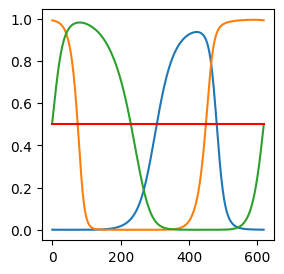

In [114]:
#Verify that hand-designed HP does nothing to Pete

neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = HPhanddesigned
dur = 100000
dt = .01
transientlen = 1000
peteC = CTRNN(3,dt,dur,HPgenome,neurongenome)

for t in range(len(np.arange(0,transientlen,dt))):
    peteC.ctrnnstep(0)
peteC.Stepnum = 0
print("before:",peteC.Biases)
peteC.run(1)
print("after:",peteC.Biases)
feats = calcfeatures(peteC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("Pete:",fit)
plot_limitcycle(feats[6],feats[7])

before: [ 0.1     -5.92321 -5.     ]
after: [ 3.41638064 -5.92321    -8.81777033]
RED: 2.1241319323560766


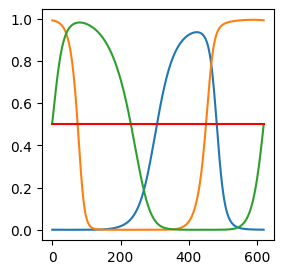

after: [ 3.42194676 -5.92321    -8.82099839]
ORANGE: 2.0803584360086647


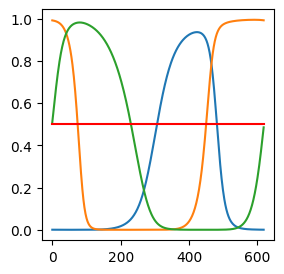

after: [ 3.49977053 -5.92321    -8.86086256]
YELLOW: 1.9779244537044147


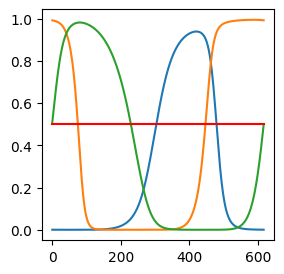

after: [ 3.94687418 -5.92321    -8.98918892]
GREEN: 1.641831104485398


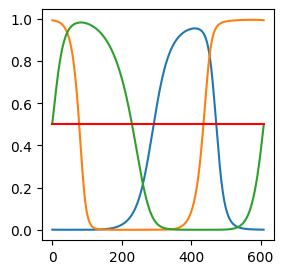

after: [ 3.43900833 -5.92321    -8.83076035]
BLUE: 2.0270071172641075


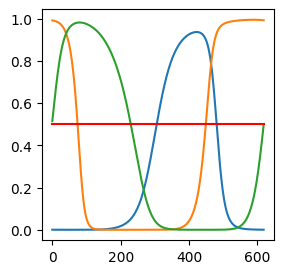

after: [ 3.41526943 -5.92321    -8.81712358]
PURPLE: 2.086840168028033


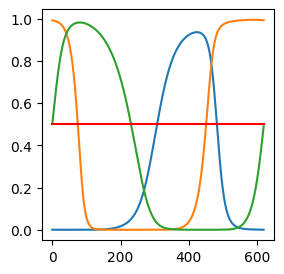

In [112]:
#With hand-designed HP, plotting only final limit cycle
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = HPhanddesigned
dur = 100000
dt = .01
transientlen = 1000
redC = CTRNN(3,dt,dur,HPgenome,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
for t in range(len(np.arange(0,transientlen,dt))):
    redC.ctrnnstep(0)
redC.Stepnum = 0
print("before:",redC.Biases)
redC.run(1)
print("after:",redC.Biases)
feats = calcfeatures(redC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("RED:",fit)
plot_limitcycle(feats[6],feats[7])
orangeC = CTRNN(3,dt,dur,HPgenome,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
for t in range(len(np.arange(0,transientlen,dt))):
    orangeC.ctrnnstep(0)
orangeC.Stepnum=0
orangeC.run(1)
print("after:",orangeC.Biases)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("ORANGE:",fit)
plot_limitcycle(feats[6],feats[7])
yellowC = CTRNN(3,dt,dur,HPgenome,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
for t in range(len(np.arange(0,transientlen,dt))):
    yellowC.ctrnnstep(0)
yellowC.Stepnum=0
yellowC.run(1)
print("after:",yellowC.Biases)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("YELLOW:",fit)
plot_limitcycle(feats[6],feats[7])
greenC = CTRNN(3,dt,dur,HPgenome,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
for t in range(len(np.arange(0,transientlen,dt))):
    greenC.ctrnnstep(0)
greenC.Stepnum = 0
greenC.run(1)
print("after:",greenC.Biases)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("GREEN:",fit)
plot_limitcycle(feats[6],feats[7])
blueC = CTRNN(3,dt,dur,HPgenome,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
for t in range(len(np.arange(0,transientlen,dt))):
    blueC.ctrnnstep(0)
blueC.Stepnum=0
blueC.run(1)
print("after:",blueC.Biases)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("BLUE:",fit)
plot_limitcycle(feats[6],feats[7])
purpleC = CTRNN(3,dt,dur,HPgenome,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
for t in range(len(np.arange(0,transientlen,dt))):
    purpleC.ctrnnstep(0)
purpleC.Stepnum = 0
purpleC.run(1)
print("after:",purpleC.Biases)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("PURPLE:",fit)
plot_limitcycle(feats[6],feats[7])

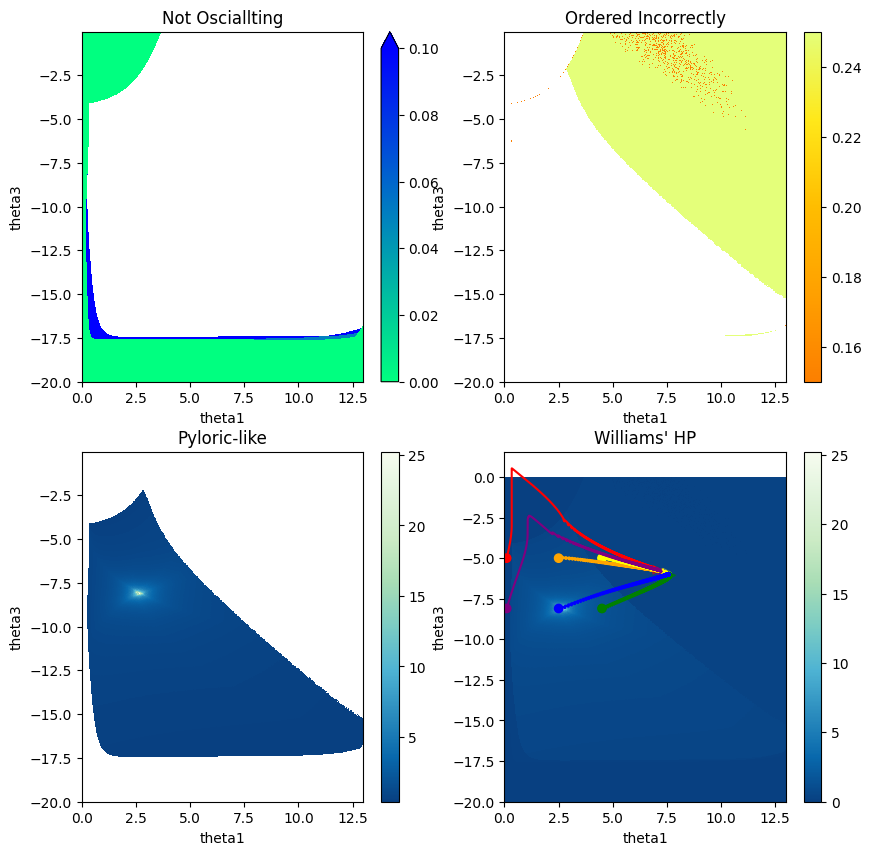

In [80]:
red = np.loadtxt('./HP_unevolved/redparamtrack.dat')
orange = np.loadtxt('./HP_unevolved/orangeparamtrack.dat')
yellow = np.loadtxt('./HP_unevolved/yellowparamtrack.dat')
green = np.loadtxt('./HP_unevolved/greenparamtrack.dat')
blue = np.loadtxt('./HP_unevolved/blueparamtrack.dat')
purple = np.loadtxt('./HP_unevolved/purpleparamtrack.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Williams' HP")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

RED: 0


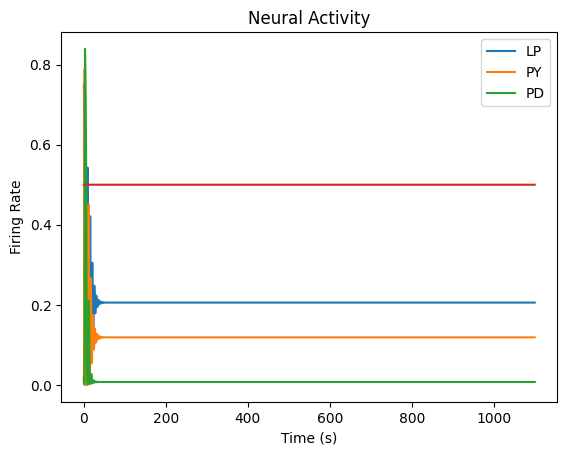

ORANGE: 0.6955363008668536


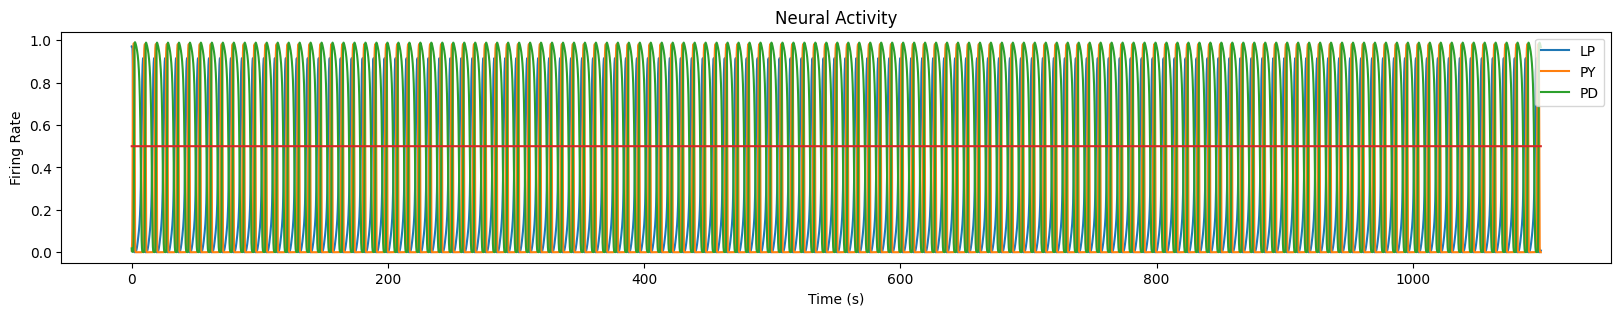

YELLOW: 0.25


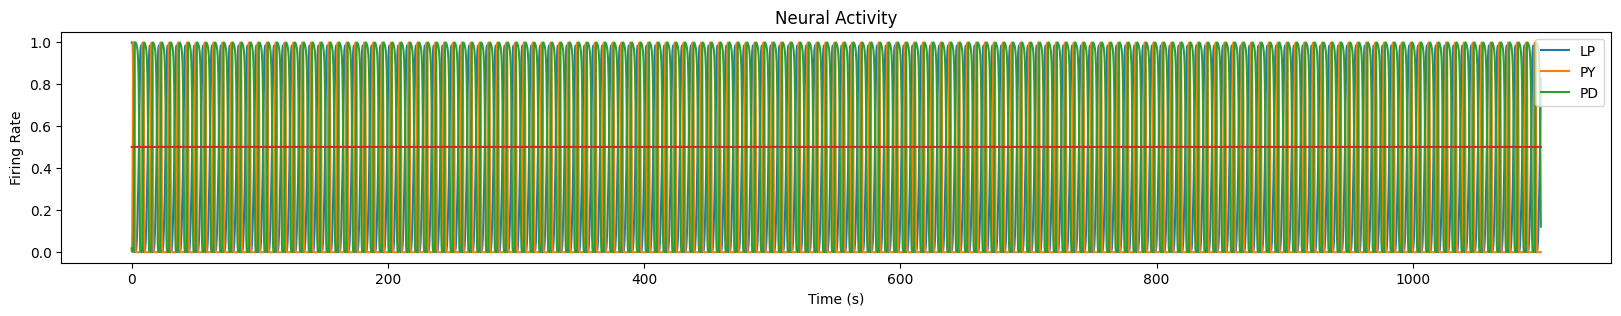

GREEN: 1.5026061512863376


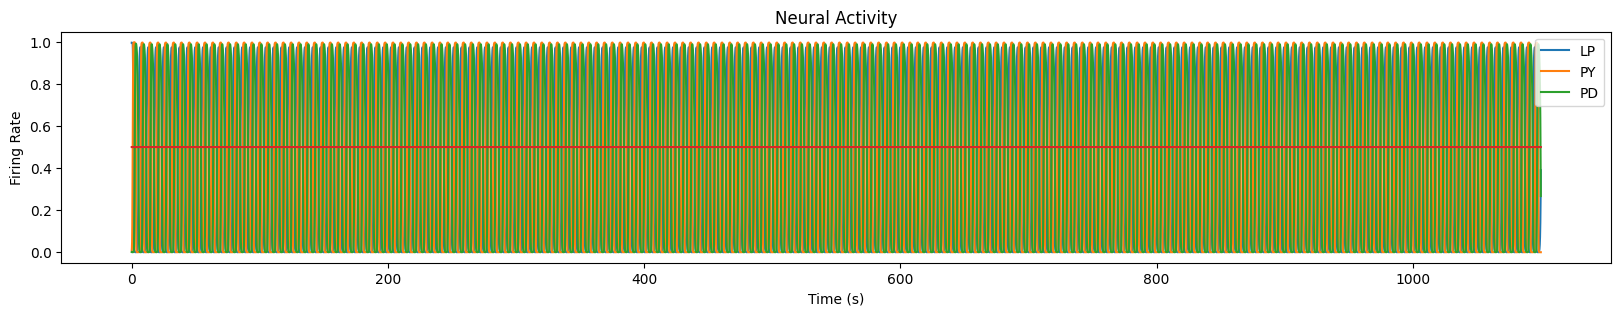

BLUE: 11.429888843722996


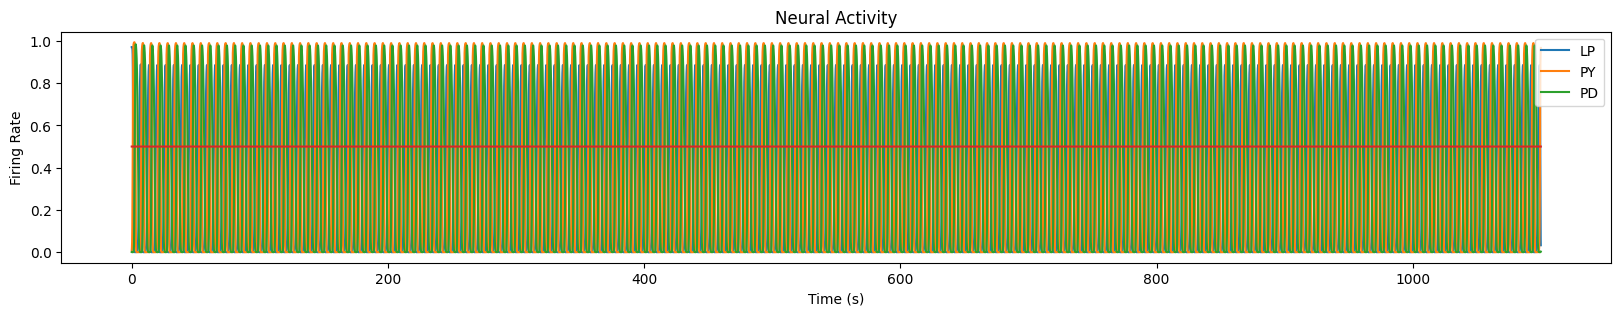

PURPLE: 0


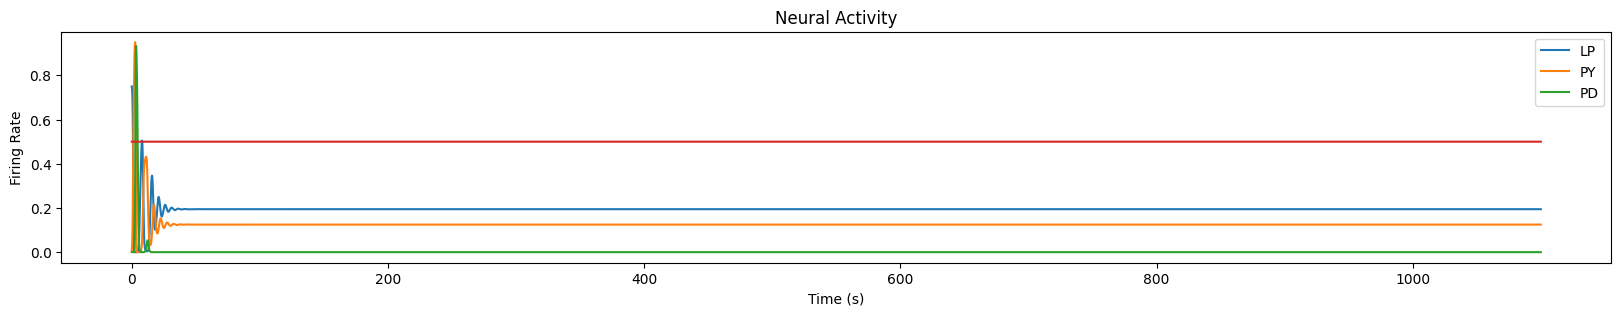

In [ ]:
#Time Series for all initial points, without HP
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
dur = 1100
redC = CTRNN(3,.001,dur,None,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
redC.run(0)
feats = calcfeatures(redC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("RED:",fit)
redC.plot()
orangeC = CTRNN(3,.001,dur,None,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
orangeC.run(0)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("ORANGE:",fit)
orangeC.plot()
yellowC = CTRNN(3,.001,dur,None,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
yellowC.run(0)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("YELLOW:",fit)
yellowC.plot()
greenC = CTRNN(3,.001,dur,None,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
greenC.run(0)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("GREEN:",fit)
greenC.plot()
blueC = CTRNN(3,.001,dur,None,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
blueC.run(0)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("BLUE:",fit)
blueC.plot()
purpleC = CTRNN(3,.001,dur,None,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
purpleC.run(0)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("PURPLE:",fit)
purpleC.plot()
#Fit calc still not consistent

before: [ 0.1     -5.92321 -5.     ]
after: [ 7.10315017 -5.92321    -5.69318496]
RED: 0.25


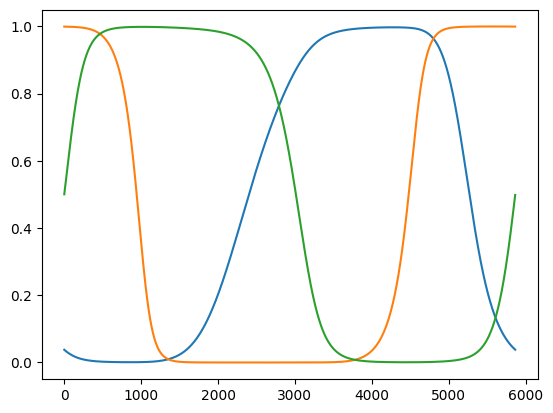

ORANGE: 0.25


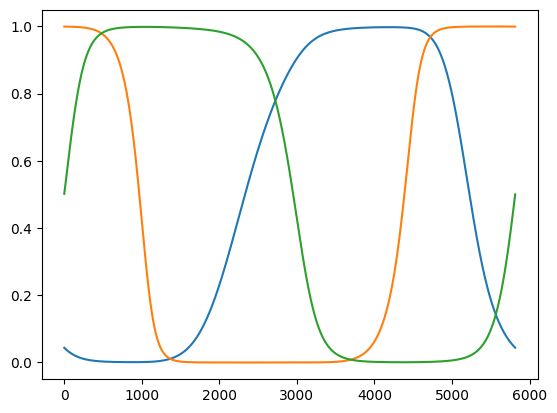

YELLOW: 0.25


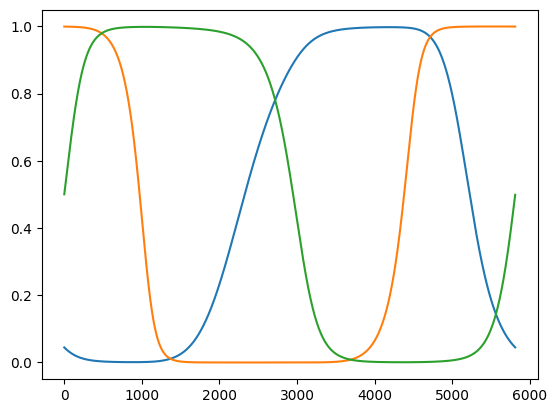

GREEN: 0.25


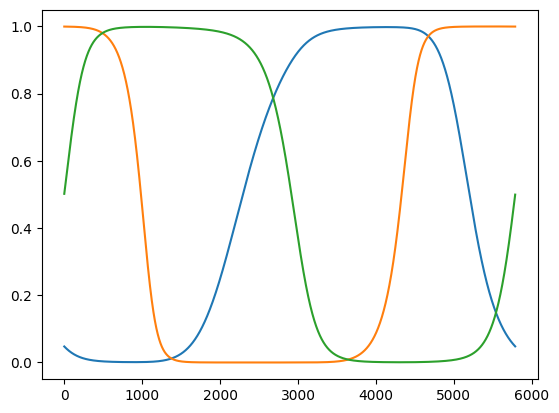

BLUE: 0.25


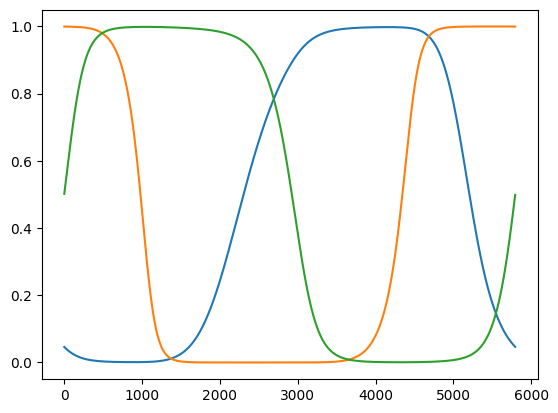

PURPLE: 0.25


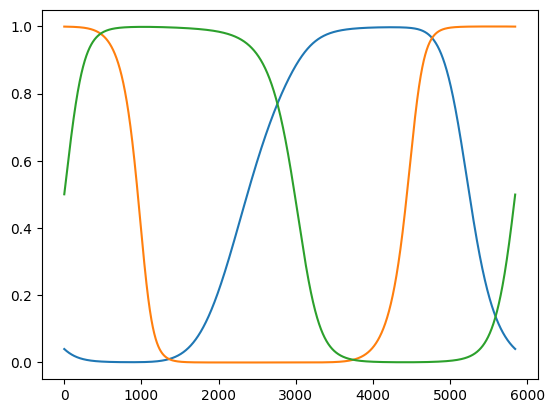

In [ ]:
#With Williams HP, plotting only final limit cycle
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([20, 1, 20, 1,1,1,.25 , 0, .25 ,.75,1, .75 ,1 ,1,1]) #exclusive to theta 1 and 3
dur = 1100
redC = CTRNN(3,.001,dur,HPgenome,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
redC.run(0)
redC.Stepnum = 0
print("before:",redC.Biases)
redC.run(1)
print("after:",redC.Biases)
feats = calcfeatures(redC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("RED:",fit)
plot_limitcycle(feats[6],feats[7])
orangeC = CTRNN(3,.001,dur,HPgenome,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
orangeC.run(0)
orangeC.Stepnum=0
orangeC.run(1)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("ORANGE:",fit)
plot_limitcycle(feats[6],feats[7])
yellowC = CTRNN(3,.001,dur,HPgenome,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
yellowC.run(0)
yellowC.Stepnum=0
yellowC.run(1)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("YELLOW:",fit)
plot_limitcycle(feats[6],feats[7])
greenC = CTRNN(3,.001,dur,HPgenome,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
greenC.run(0)
greenC.Stepnum = 0
greenC.run(1)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("GREEN:",fit)
plot_limitcycle(feats[6],feats[7])
blueC = CTRNN(3,.001,dur,HPgenome,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
blueC.run(0)
blueC.Stepnum=0
blueC.run(1)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("BLUE:",fit)
plot_limitcycle(feats[6],feats[7])
purpleC = CTRNN(3,.001,dur,HPgenome,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
purpleC.run(0)
purpleC.Stepnum = 0
purpleC.run(1)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("PURPLE:",fit)
plot_limitcycle(feats[6],feats[7])

RED:


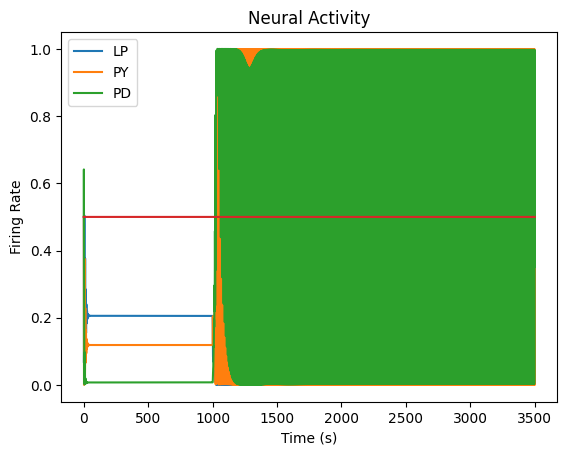

0.25
ORANGE:


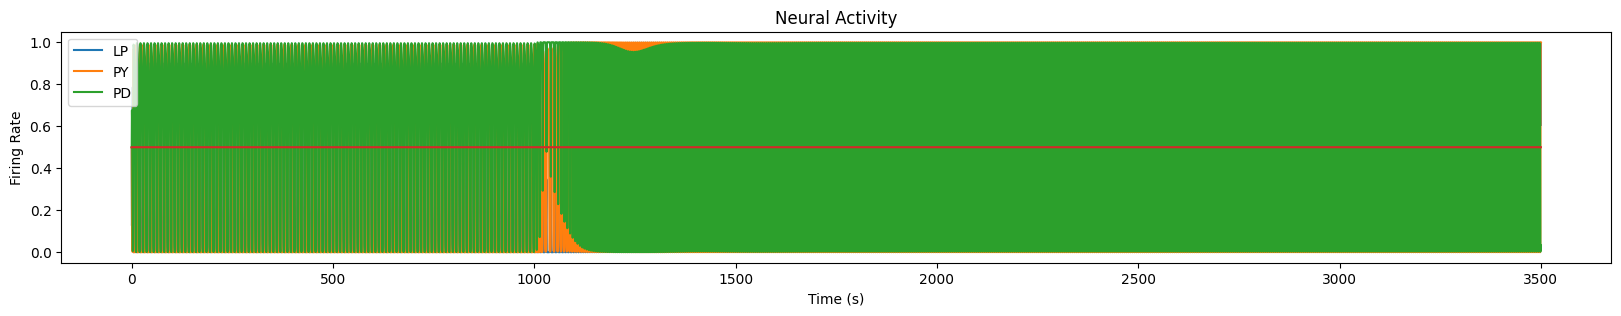

0.25
YELLOW:


KeyboardInterrupt: 

In [75]:
#Time series for all IC's with Williams' HP, plotting whole timeseries (how it got there)

neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([20, 1, 20, 1,1,1,.25 , .25, .25 ,.75,.75, .75 ,1 ,1,1])

neurongenome[9] = red[0,0]
neurongenome[11]= red[0,1]
print("RED:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = orange[0,0]
neurongenome[11] = orange[0,1]
print("ORANGE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = yellow[0,0]
neurongenome[11] = yellow[0,1]
print("YELLOW:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = green[0,0]
neurongenome[11] = green[0,1]
print("GREEN:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = blue[0,0]
neurongenome[11] = blue[0,1]
print("BLUE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = purple[0,0]
neurongenome[11] = purple[0,1]
print("PURPLE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))


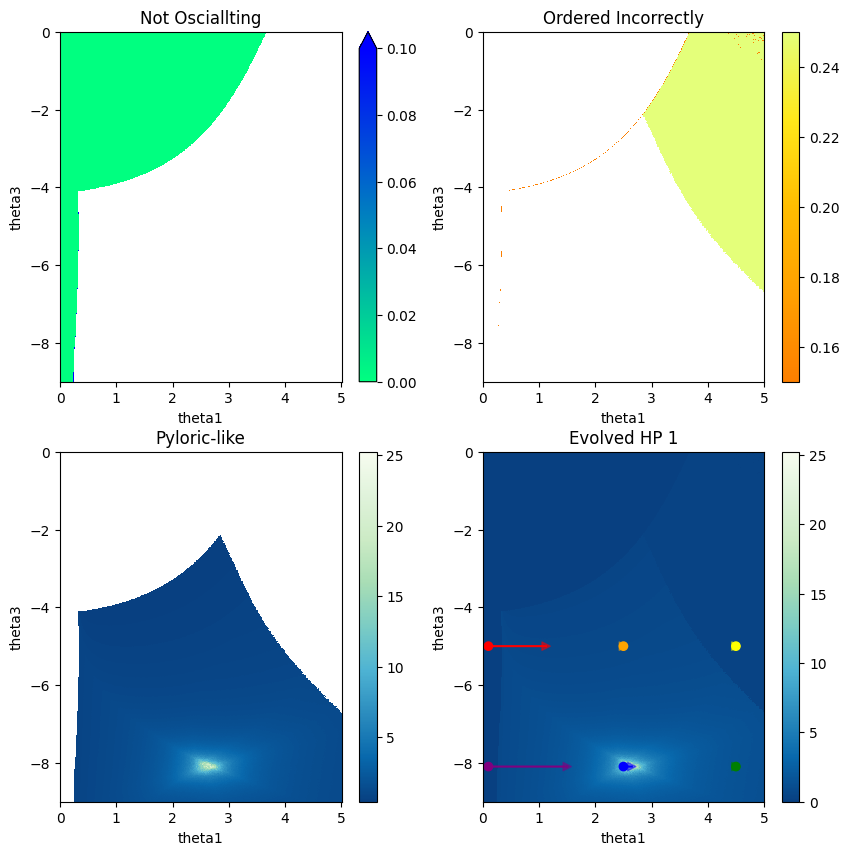

In [ ]:
red = np.loadtxt('redparamtrack5.dat')
orange = np.loadtxt('orangeparamtrack5.dat')
yellow = np.loadtxt('yellowparamtrack5.dat')
green = np.loadtxt('greenparamtrack5.dat')
blue = np.loadtxt('blueparamtrack5.dat')
purple = np.loadtxt('purpleparamtrack5.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Evolved HP 1")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

RED:


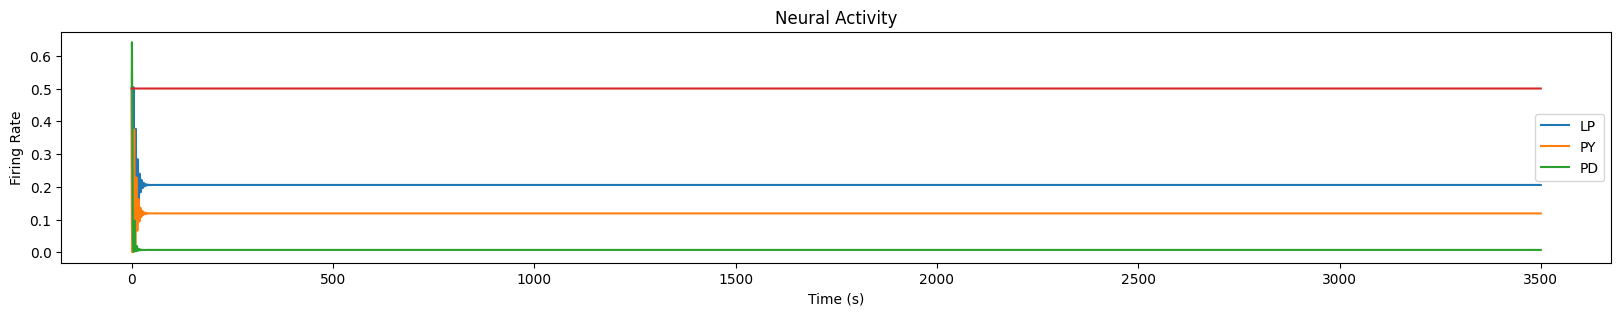

0.0
ORANGE:


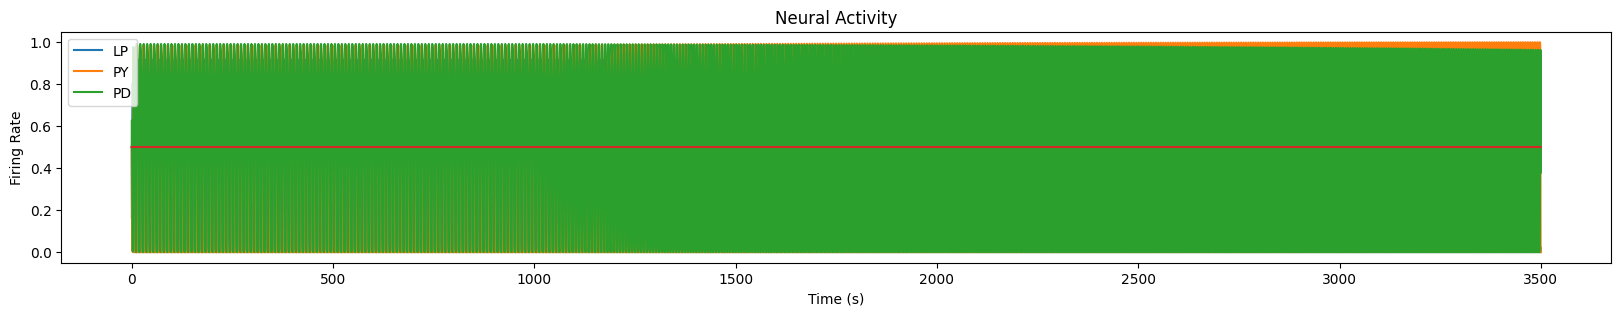

0.7551314902910642
YELLOW:


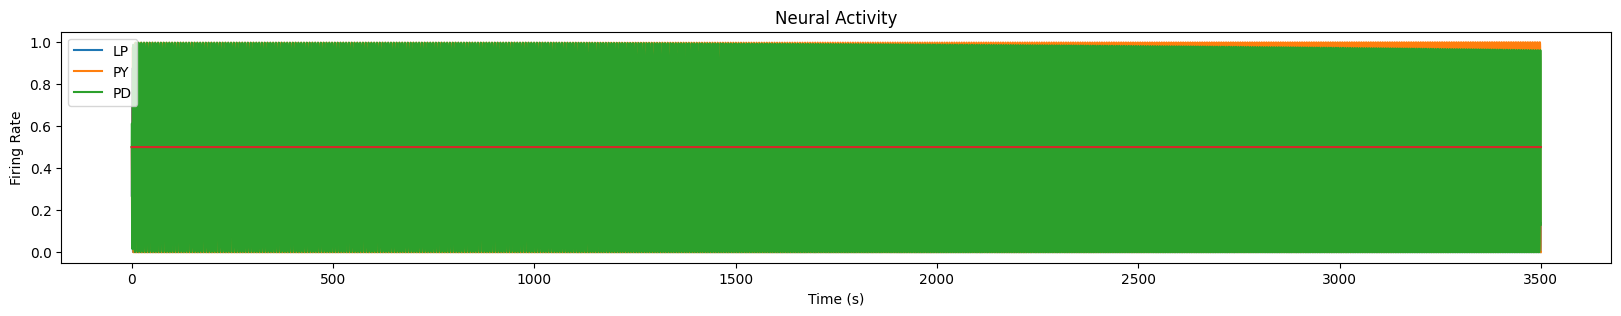

0.7136654623193313
GREEN:


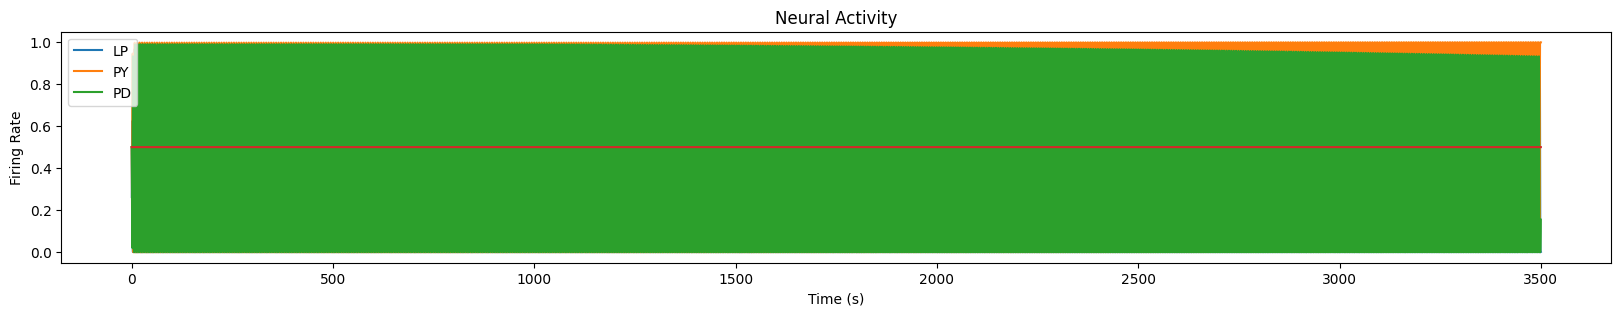

0.5940261815261305
BLUE:


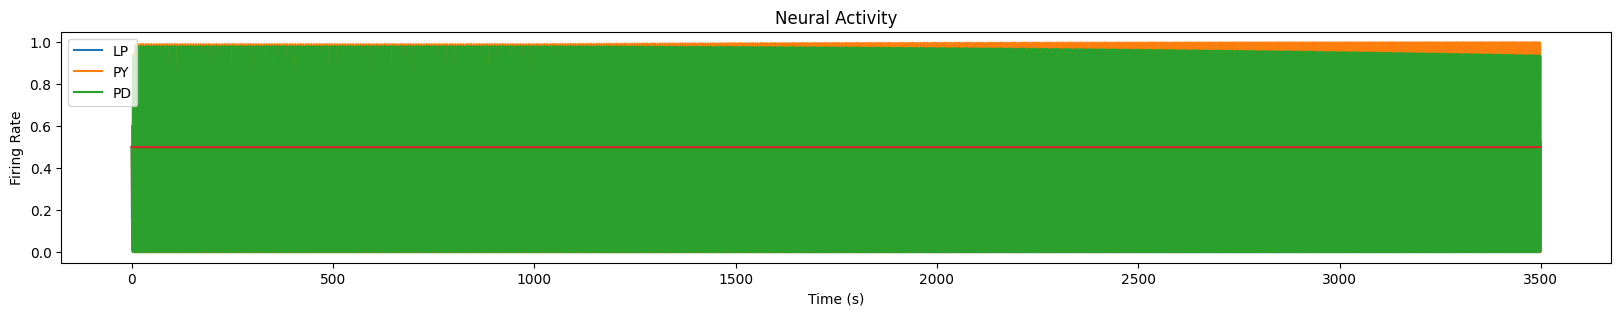

0.6159089656098311
PURPLE:


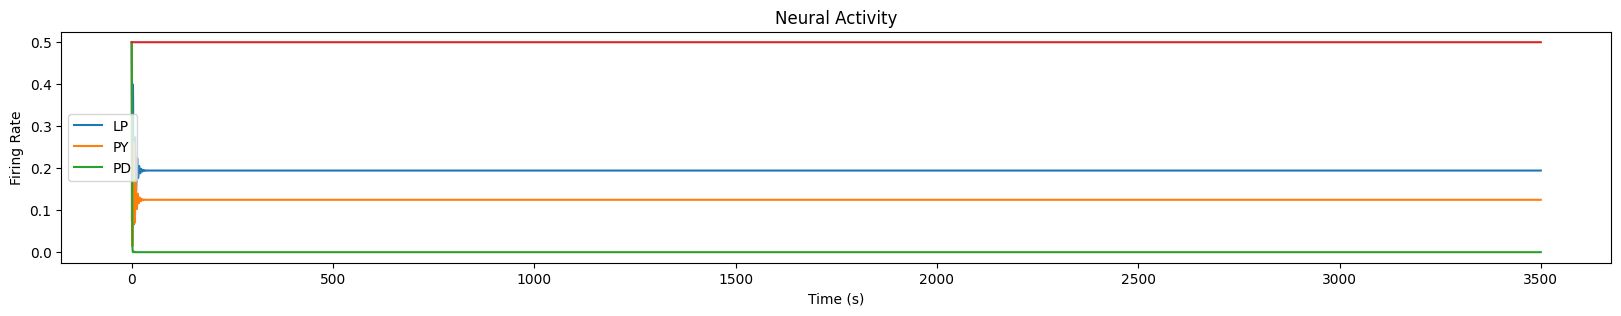

0.0


In [10]:
#Time series with evolved HP #5

neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([169.288,1, 115.095,1,1,1, 0.00625323,0, 0, 0.583122,1, 0.212414, 78,1, 113])

neurongenome[9] = red[0,0]
neurongenome[11]= red[0,1]
print("RED:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = orange[0,0]
neurongenome[11] = orange[0,1]
print("ORANGE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = yellow[0,0]
neurongenome[11] = yellow[0,1]
print("YELLOW:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = green[0,0]
neurongenome[11] = green[0,1]
print("GREEN:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = blue[0,0]
neurongenome[11] = blue[0,1]
print("BLUE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = purple[0,0]
neurongenome[11] = purple[0,1]
print("PURPLE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

#Doesn't match C++-generated, but might be C++ fault
 


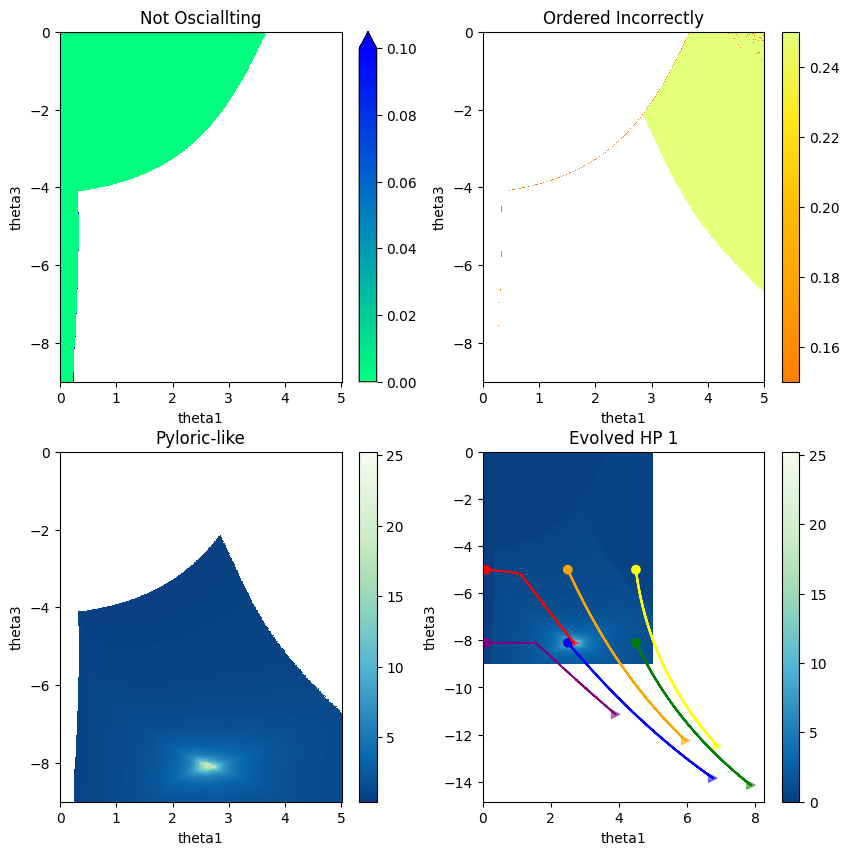

In [10]:
#Evolved HP #1 (really number 2 in bestindsfile)
red = np.loadtxt('HP_SWworks/redparamtrack1.dat')
orange = np.loadtxt('HP_SWworks/orangeparamtrack1.dat')
yellow = np.loadtxt('HP_SWworks/yellowparamtrack1.dat')
green = np.loadtxt('HP_SWworks/greenparamtrack1.dat')
blue = np.loadtxt('HP_SWworks/blueparamtrack1.dat')
purple = np.loadtxt('HP_SWworks/purpleparamtrack1.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Evolved HP 1")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

before: [ 0.1     -5.92321 -5.     ]
after: [ 2.77486047 -5.92321    -8.22329909]


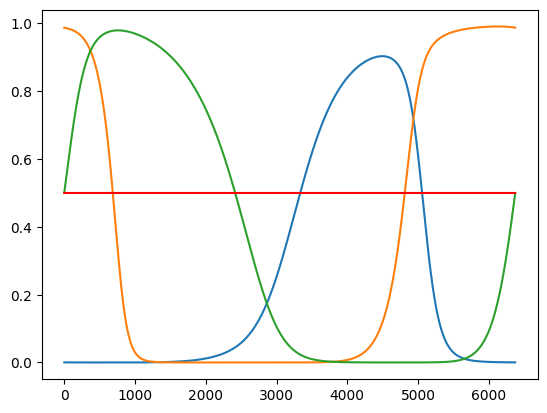

RED: 8.852681746557083
before: [ 2.5     -5.92321 -5.     ]
after: [  5.98153411  -5.92321    -12.23298567]


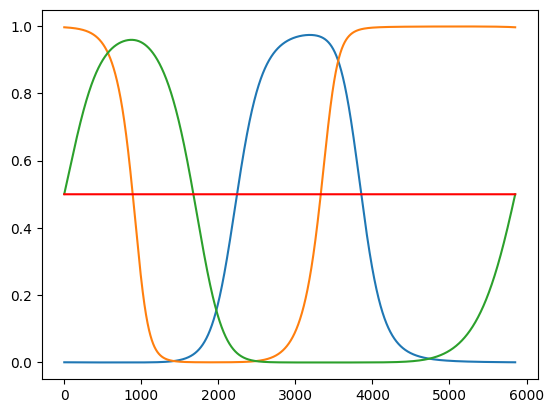

ORANGE: 0.6862223014091899
before: [ 4.5     -5.92321 -5.     ]
after: [  6.90270429  -5.92321    -12.45904739]


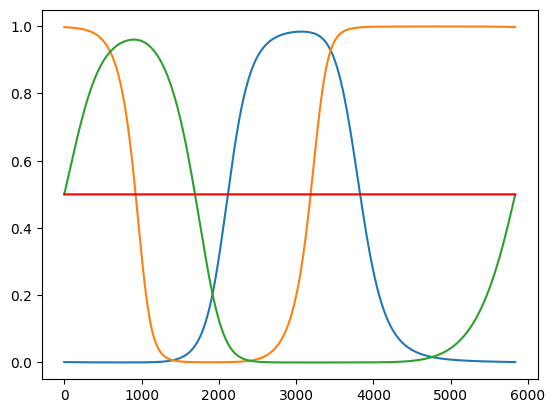

YELLOW: 0.6458370785934682
before: [ 4.5     -5.92321 -8.1    ]
after: [  7.8975048   -5.92321    -14.11952577]


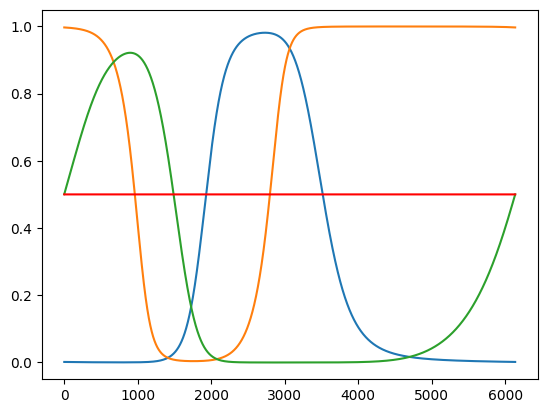

GREEN: 0.5595197855409074
before: [ 2.5     -5.92321 -8.1    ]
after: [  6.78963885  -5.92321    -13.81931148]


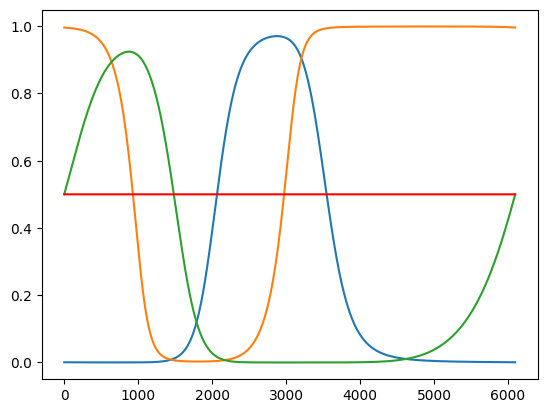

BLUE: 0.5795067479901601
before: [ 0.1     -5.92321 -8.1    ]
after: [  4.00411137  -5.92321    -11.2073979 ]


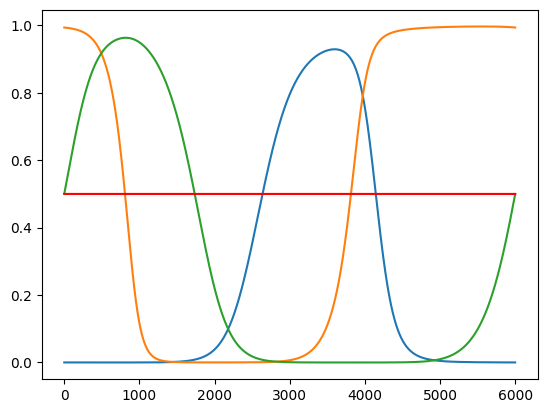

PURPLE: 0.8445393535732719


In [11]:
#Python re-implementation of HP#1, plotting only final limit cycle
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([182.009,1, 104.542,1,1,1, 0.231874,0, 0 ,0.231874,1, 0 ,19,1, 15]) #exclusive to theta 1 and 3
dur = 2000
redC = CTRNN(3,.001,dur,HPgenome,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
# redC.run(0)
# redC.Stepnum = 0
print("before:",redC.Biases)
redC.run(1)
print("after:",redC.Biases)
feats = calcfeatures(redC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("RED:",fit)
orangeC = CTRNN(3,.001,dur,HPgenome,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
# orangeC.run(0)
# orangeC.Stepnum=0
print("before:",orangeC.Biases)
orangeC.run(1)
print("after:",orangeC.Biases)
# print(orangeC.min_firingrate,' ',orangeC.max_firingrate)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("ORANGE:",fit)
yellowC = CTRNN(3,.001,dur,HPgenome,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
# yellowC.run(0)
# yellowC.Stepnum=0
print("before:",yellowC.Biases)
yellowC.run(1)
print("after:",yellowC.Biases)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("YELLOW:",fit)
greenC = CTRNN(3,.001,dur,HPgenome,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
# greenC.run(0)
# greenC.Stepnum = 0
print("before:",greenC.Biases)
greenC.run(1)
print("after:",greenC.Biases)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("GREEN:",fit)
blueC = CTRNN(3,.001,dur,HPgenome,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
# blueC.run(0)
# blueC.Stepnum=0
print("before:",blueC.Biases)
blueC.run(1)
print("after:",blueC.Biases)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("BLUE:",fit)
purpleC = CTRNN(3,.001,dur,HPgenome,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
# purpleC.run(0)
# purpleC.Stepnum = 0
print("before:",purpleC.Biases)
purpleC.run(1)
print("after:",purpleC.Biases)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("PURPLE:",fit)


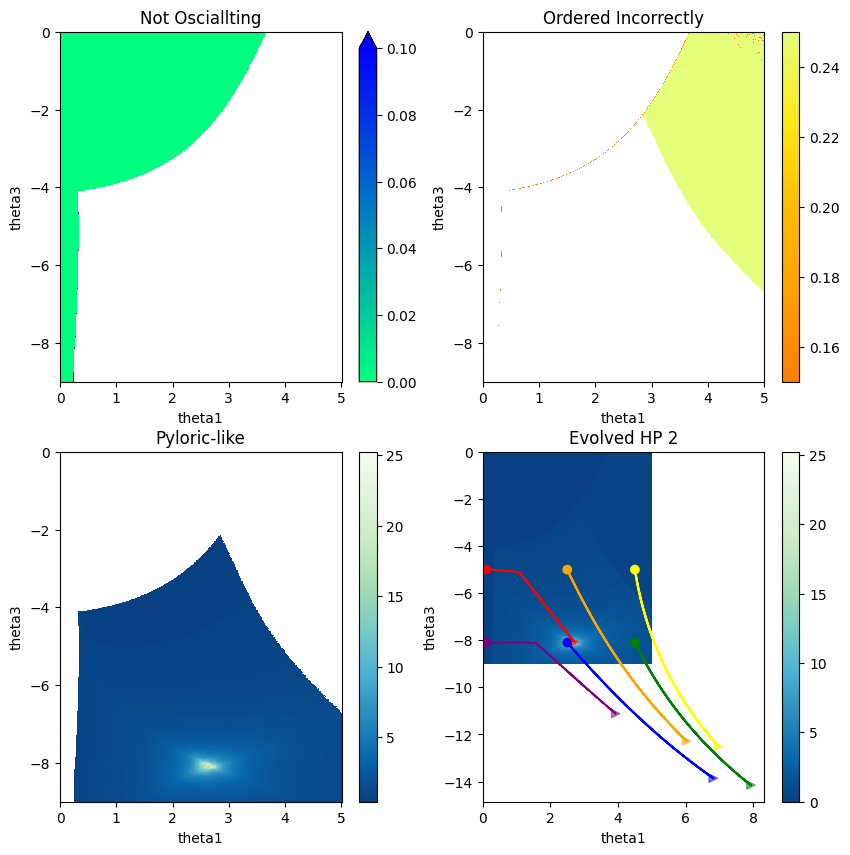

In [8]:
#Evolved HP #2 (really number 1 in bestindsfile, and best fit)
red = np.loadtxt('HP_SWworks/redparamtrack2.dat')
orange = np.loadtxt('HP_SWworks/orangeparamtrack2.dat')
yellow = np.loadtxt('HP_SWworks/yellowparamtrack2.dat')
green = np.loadtxt('HP_SWworks/greenparamtrack2.dat')
blue = np.loadtxt('HP_SWworks/blueparamtrack2.dat')
purple = np.loadtxt('HP_SWworks/purpleparamtrack2.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Evolved HP 2")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

before: [ 0.1     -5.92321 -5.     ]
after: [ 2.83472452 -5.92321    -8.23244985]


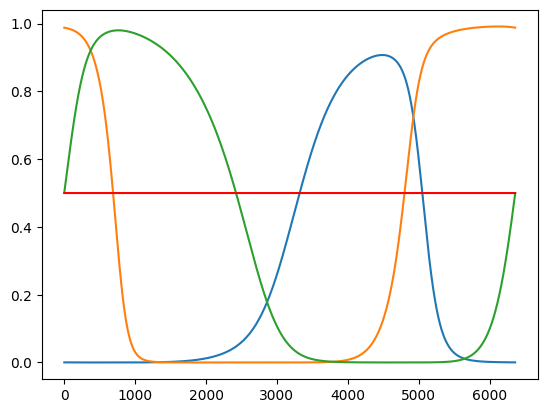

RED: 8.402699961117856
before: [ 2.5     -5.92321 -5.     ]
after: [  6.07667522  -5.92321    -12.25682676]


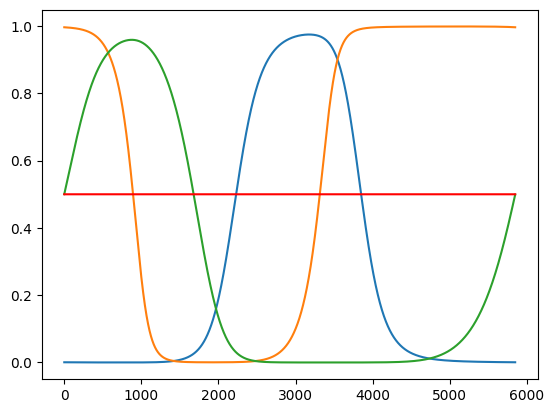

ORANGE: 0.681903091084044
before: [ 4.5     -5.92321 -5.     ]
after: [  7.01187992  -5.92321    -12.48410079]


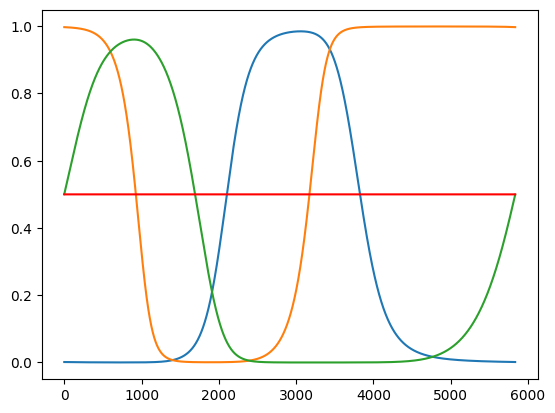

YELLOW: 0.6418709074383007
before: [ 4.5     -5.92321 -8.1    ]
after: [  7.98197974  -5.92321    -14.13639035]


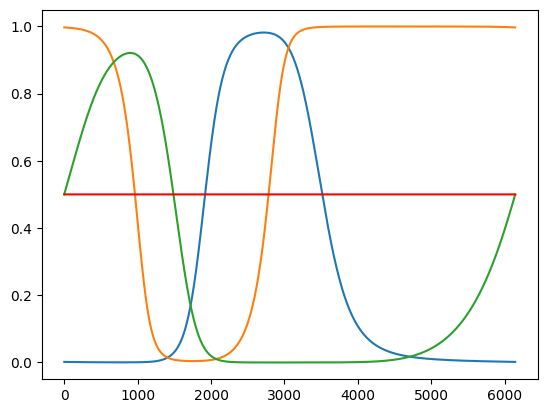

GREEN: 0.5575867801107488
before: [ 2.5     -5.92321 -8.1    ]
after: [  6.87803445  -5.92321    -13.84183558]


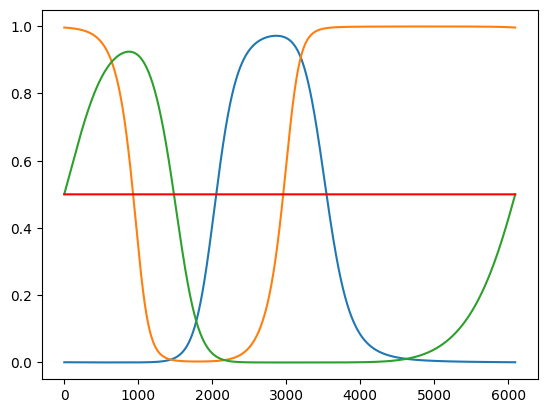

BLUE: 0.5782920603765747
before: [ 0.1     -5.92321 -8.1    ]
after: [  4.05504067  -5.92321    -11.21325025]


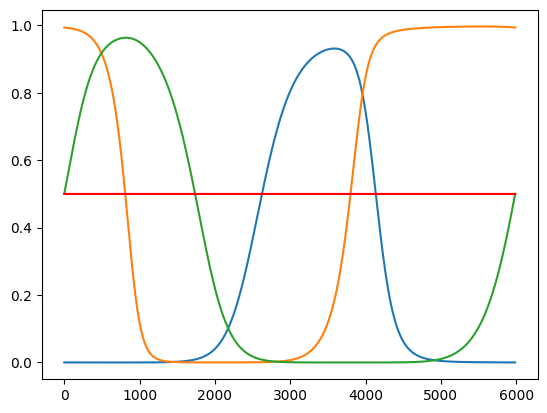

PURPLE: 0.8432623623587574


In [9]:
#With HP#2, plotting only final limit cycle
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([184.764,1, 103.735,1,1,1, 0.232306,0, 0, 0.338326,1, 0.00434589, 39,1, 79]) #exclusive to theta 1 and 3
dur = 2000
redC = CTRNN(3,.001,dur,HPgenome,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
# redC.run(0)
# redC.Stepnum = 0
print("before:",redC.Biases)
redC.run(1)
print("after:",redC.Biases)
feats = calcfeatures(redC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("RED:",fit)
orangeC = CTRNN(3,.001,dur,HPgenome,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
# orangeC.run(0)
# orangeC.Stepnum=0
print("before:",orangeC.Biases)
orangeC.run(1)
print("after:",orangeC.Biases)
# print(orangeC.min_firingrate,' ',orangeC.max_firingrate)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("ORANGE:",fit)
yellowC = CTRNN(3,.001,dur,HPgenome,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
# yellowC.run(0)
# yellowC.Stepnum=0
print("before:",yellowC.Biases)
yellowC.run(1)
print("after:",yellowC.Biases)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("YELLOW:",fit)
greenC = CTRNN(3,.001,dur,HPgenome,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
# greenC.run(0)
# greenC.Stepnum = 0
print("before:",greenC.Biases)
greenC.run(1)
print("after:",greenC.Biases)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("GREEN:",fit)
blueC = CTRNN(3,.001,dur,HPgenome,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
# blueC.run(0)
# blueC.Stepnum=0
print("before:",blueC.Biases)
blueC.run(1)
print("after:",blueC.Biases)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("BLUE:",fit)
purpleC = CTRNN(3,.001,dur,HPgenome,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
# purpleC.run(0)
# purpleC.Stepnum = 0
print("before:",purpleC.Biases)
purpleC.run(1)
print("after:",purpleC.Biases)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("PURPLE:",fit)


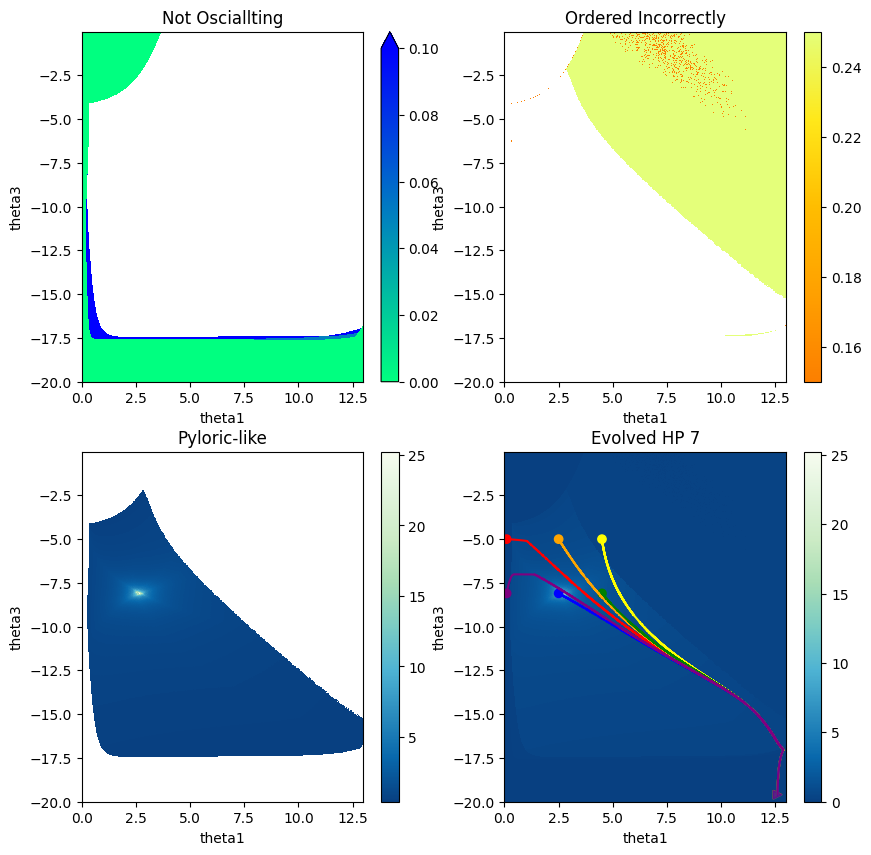

In [36]:
#Evolved HP #7, testing for a long long time (100,000s) to see if there is a fixed point aroud (12.5,-17.5), or whether will drift
red = np.loadtxt('HP_SWworks/redparamtrack7long.dat')
orange = np.loadtxt('HP_SWworks/orangeparamtrack7long.dat')
yellow = np.loadtxt('HP_SWworks/yellowparamtrack7long.dat')
green = np.loadtxt('HP_SWworks/greenparamtrack7long.dat')
blue = np.loadtxt('HP_SWworks/blueparamtrack7long.dat')
purple = np.loadtxt('HP_SWworks/purpleparamtrack7long.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Evolved HP 7")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

before: [ 13.       -5.92321 -17.3    ]
after: [ 12.68613221  -5.92321    -16.        ]


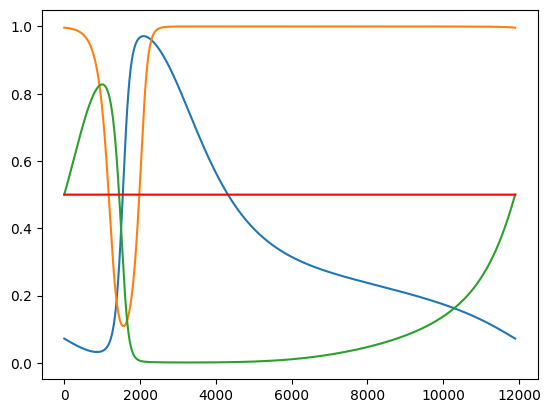

TEST: 0.4418313125364073


In [19]:
#Figure out what is down by the turn point ~(12.5,-18)
shortdur = 1000
HPgenome = # number 7
testC = CTRNN(3,.001,shortdur,HPgenome,neurongenome)
testC.setBiases(np.array([13 , -5.92321, -17.3]))
print("before:",testC.Biases)
testC.run(1)
print("after:",testC.Biases)
feats = calcfeatures(testC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("TEST:",fit)
#it is 